# Logistic Regression Assignment

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics

### Part 1: Data Exploration: Graduate School Admissions

In [319]:
data = pd.read_csv("data_Log/grad.csv")

In [320]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [321]:
pd.crosstab(data['admit'],data['rank'])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


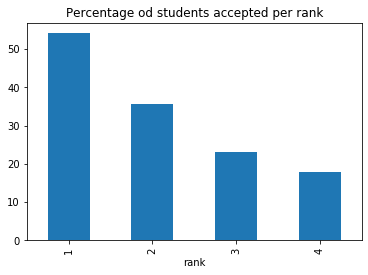

In [322]:
data_group = data.groupby(['rank'])['admit']

data_new = data_group.aggregate({'Total_Admitted':np.sum})


data_new['Total applied'] = data_group.count()
data_new['% in'] = data_new['Total_Admitted']*100 / data_new['Total applied']

data_new['% in'].plot(kind = 'bar', title = 'Percentage od students accepted per rank');

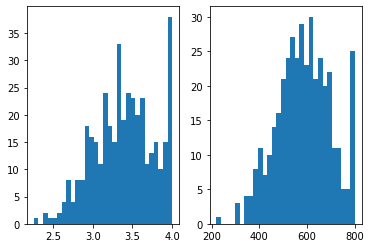

In [323]:
fig, ax = plt.subplots(1,2)

for i, ax in enumerate(ax.flatten()):
              
    if i == 0:          
        ax.hist(data['gpa'], bins = 30)
        
    else:
        ax.hist(data['gre'], bins = 30)

In [324]:
data_new = data_group.sum()

(np.sum(data['admit']) / len(data))*100

31.75

### Part 2: Predicting Graduate School Admissions

In [325]:
X = data.drop('admit', axis = 1)
y = data['admit']

kf = KFold(n_splits = 5, shuffle = True)
acc = []
presc = []
recall = []

for train, test in kf.split(X):

    model = LogisticRegression()
    model.fit(X.loc[train], y.loc[train])
    res = model.predict(X.loc[test])
    
    acc.append(metrics.accuracy_score(y.loc[test], res))
    presc.append(metrics.precision_score(y.loc[test], res))
    recall.append(metrics.recall_score(y.loc[test], res))
    
print('Average accuracy: ', round(np.mean(acc),2))
print('Average precision: ', round(np.mean(presc),2))
print('Average recall: ', round(np.mean(recall),2))

Average accuracy:  0.7
Average precision:  0.58
Average recall:  0.22


/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

In [326]:
data_new = pd.concat([data.drop('rank', axis = 1), pd.get_dummies(data['rank'])], axis = 1)
data_new = data_new.drop(1, axis = 1)             
data_new.head()

,admit,gre,gpa,2,3,4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [327]:
X = data_new.drop('admit', axis = 1)
y = data_new['admit']

kf = KFold(n_splits = 5, shuffle = True)
acc = []
presc = []
recall = []

for train, test in kf.split(X):

    model = LogisticRegression()
    model.fit(X.loc[train], y.loc[train])
    res = model.predict(X.loc[test])
    
    acc.append(metrics.accuracy_score(y.loc[test], res))
    presc.append(metrics.precision_score(y.loc[test], res))
    recall.append(metrics.recall_score(y.loc[test], res))
    
print('Average accuracy: ', round(np.mean(acc),2))
print('Average precision: ', round(np.mean(presc),2))
print('Average recall: ', round(np.mean(recall),2))

Average accuracy:  0.7
Average precision:  0.68
Average recall:  0.16


/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

In [345]:
X = data_new.drop('admit', axis = 1)
y = data_new['admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

model = LogisticRegression()
probs_0 = (model.fit(X_train,y_train).predict_proba(X_test))[:,1]
res = model.fit(X_train,y_train).predict(X_test)


/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [338]:
def ROC_curve(probabilities, labels):
    
    
    probabilities = probabilities[probabilities.argsort()]
    TPR = []
    FPR = []
    
    for i in probabilities:
        
        probs = []
        
        
        for m in range(len(probabilities)):
            
            probs.append(1 if i >= probabilities[m] else 0)
        
        
        TPR.append(metrics.confusion_matrix(labels, probs)[0,0]/(metrics.confusion_matrix(labels, probs)[0,0]+metrics.confusion_matrix(labels, probs)[0,1]))
        FPR.append(metrics.confusion_matrix(labels, probs)[1,0]/(metrics.confusion_matrix(labels, probs)[1,0]+metrics.confusion_matrix(labels, probs)[1,1]))
    
    return TPR, FPR, probs         

Text(0, 0.5, 'TPR')

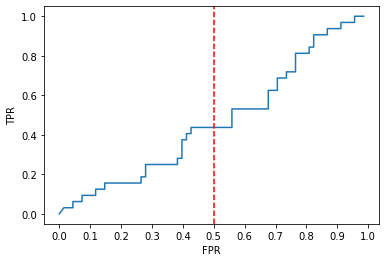

In [339]:
fig, ax = plt.subplots()

t = ROC_curve(probs_0, y_test)

ax.plot(t[0], t[1])
ax.axvline(0.5,c = 'red', ls = '--')
plt.xticks(np.arange(0,1.1,0.1));
plt.xlabel('FPR')
plt.ylabel('TPR')

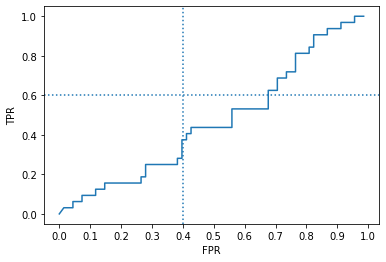

In [341]:
fig, ax = plt.subplots()

t = ROC_curve(probs_0, y_test)

ax.plot(t[0], t[1])
plt.xticks(np.arange(0,1.1,0.1));
plt.xlabel('FPR')
plt.ylabel('TPR')

ax.axhline(0.6, ls = ':')
ax.axvline(0.4, ls=':');

In [369]:
probs_0 = probs_0[probs_0.argsort()]
n = []

for i in probs_0:
        
        n.append([1 if i >= probs_0[0] else 0])



AttributeError: 'Series' object has no attribute 'reshape'